<a href="https://colab.research.google.com/github/amanbadone/AgroSapiens/blob/main/Module_2_(Crop_Production_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("ICRISAT-District Level Data.csv")
df.head()

,Dist Code,Year,State Code,State Name,Dist Name,WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons)
0,42,1966,6,Madhya Pradesh,Shajapur,31.0,19.0
1,42,1967,6,Madhya Pradesh,Shajapur,45.0,36.0
2,42,1968,6,Madhya Pradesh,Shajapur,57.5,42.0
3,42,1969,6,Madhya Pradesh,Shajapur,59.6,41.5
4,42,1970,6,Madhya Pradesh,Shajapur,69.1,69.6


In [ ]:
df=df.drop('Dist Code', axis = 1 )
df=df.drop('State Code', axis = 1 )
df=df.drop('Dist Name', axis = 1 )
df=df.drop('State Name', axis = 1 )
df

,Year,WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons)
0,1966,31.00,19.00
1,1967,45.00,36.00
2,1968,57.50,42.00
3,1969,59.60,41.50
4,1970,69.10,69.60
5,1971,77.90,103.80
6,1972,56.00,49.80
7,1973,87.60,92.00
8,1974,49.60,71.10
9,1975,70.10,91.40


In [ ]:
train , valid , test =np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
from sklearn.preprocessing import StandardScaler
def scale_dataset(dataframe):
  y = dataframe[dataframe.columns[2]].values
  X = dataframe.drop(dataframe.columns[2], axis=1).values

  # SCALER = StandardScaler()
  # X = SCALER.fit_transform(X)

  data= np.hstack((X,np.reshape(y,(-1,1))))
  return data,X,y

In [ ]:
train ,X_train, Y_train = scale_dataset(train)
valid ,X_valid, Y_valid = scale_dataset(valid)
test ,X_test, Y_test = scale_dataset(test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# assuming X_train, y_train are obtained using scale_dataset function
linreg_model = LinearRegression()

# fit the model to the training data
linreg_model.fit(X_train, Y_train)

# make predictions on the test data
y_pred = linreg_model.predict(X_test)

# evaluate the performance of the model
score = linreg_model.score(X_test, Y_test)
print ("X Test :" , X_test)

X Test : [[1967.    45. ]
 [1980.    47.6]
 [1971.    77.9]
 [2010.    90.8]
 [1979.    48.7]
 [1972.    56. ]
 [1969.    59.6]
 [2003.    77.5]
 [2014.   118. ]
 [2013.   166.8]
 [2015.   171. ]]


In [ ]:
print ("Predictions :" , y_pred)

Predictions : [ 29.82706699  58.96606297 145.42595067 249.78463635  61.04307371
  74.25338832  81.48099102 194.56377967 346.44868137 506.98039458
 524.08654281]


In [ ]:

print("Real Results : ", Y_test)

Real Results :  [ 36.    55.6  103.8  182.1   58.2   49.8   41.5  148.3  362.   376.83
 552.  ]


In [ ]:
print("Score:", score)

Score: 0.9057672169006649


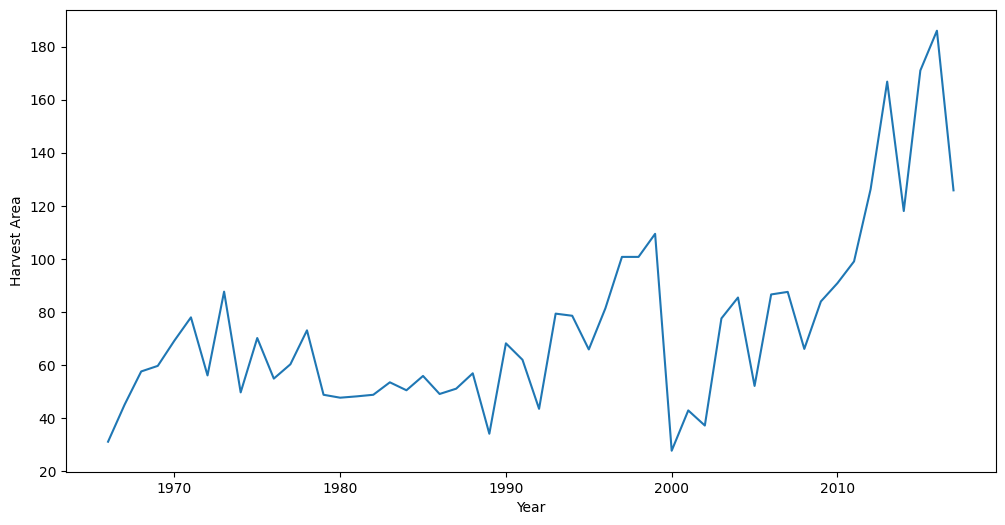

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['WHEAT AREA (1000 ha)'])
plt.xlabel('Year')
plt.ylabel('Harvest Area')
plt.show()

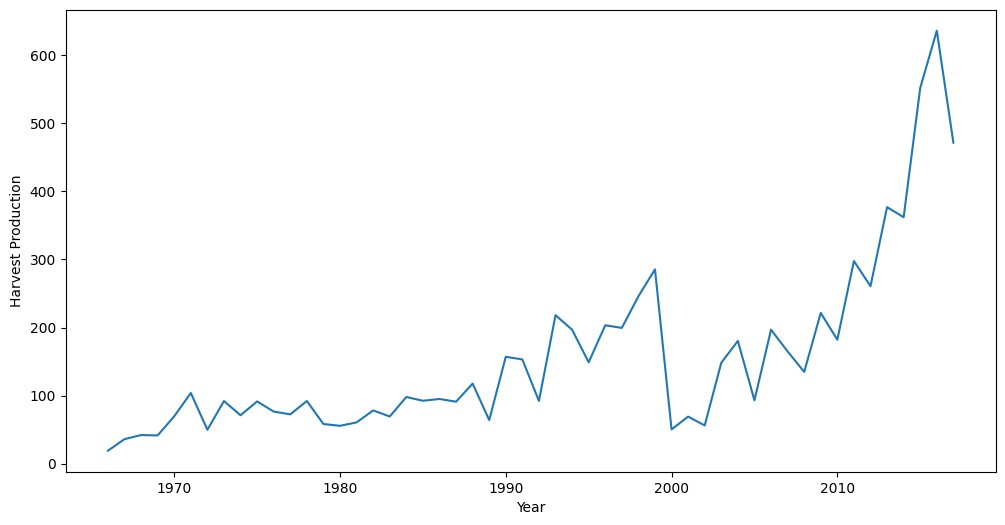

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['WHEAT PRODUCTION (1000 tons)'])
plt.xlabel('Year')
plt.ylabel('Harvest Production')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train,Y_train)

# Step 4: Make predictions on the testing set and evaluate model performance using mean squared error
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error:', mse)
print('Accuracy',rf_model.score(X_test,Y_test))

Mean Squared Error: 1757.082646855448
Accuracy 0.9364692483662255


#Lets go one step further towards neural network and implement this same stuff using neural network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
normalizer = tf.keras.layers.Normalization(input_shape = (2,),axis =1)
normalizer.adapt(X_train)

In [ ]:
model=tf.keras.Sequential(
    [
        normalizer,
     tf.keras.layers.Dense(1)
    ]
)
model.predict(X_train[:10])

1/1 [==============================] - 0s 46ms/step


array([[ 0.8227833 ],
       [ 3.3770876 ],
       [-1.0413134 ],
       [-2.3202686 ],
       [ 1.5875959 ],
       [-1.3036261 ],
       [ 0.19981153],
       [-0.22185794],
       [ 0.7617207 ],
       [ 1.147161  ]], dtype=float32)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.01),loss ="mean_squared_error")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 8
Trainable params: 3
Non-trainable params: 5
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train, Y_train,
    verbose=0,
    epochs=1000,
    validation_data=(X_valid, Y_valid)
)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
995,33541.550781,18791.730469,995
996,33535.445312,18788.886719,996
997,33529.339844,18786.046875,997
998,33523.238281,18783.203125,998
999,33517.136719,18780.359375,999


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

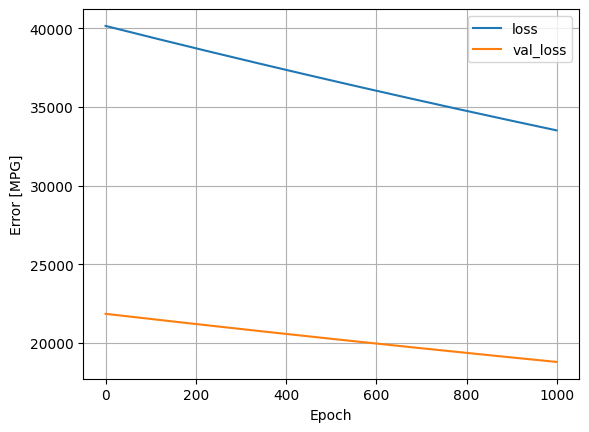

In [ ]:
plot_loss(history)
plt.show()